# Final Project

## 4/20/2025

- Team Members
    - Brittney Bedrossian
    - Breenda Shah
    - Jeb Besecker
    - Kevin Dennin
    - Kohry Long

### This serves as an initial exploration and data pre processing module. 

In [97]:
#hello world

# Imports 

In [98]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import graphviz
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Changelog Intialization

In [99]:
# Initilize changelog
changelog = []

# Data Load

In [100]:
# Load the dataset
df = pd.read_csv("../Data/loan_data.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1


In [101]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  int64  
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  int64  
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [102]:
# Intial Stats of numerical variables
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


**Initial observations of the numerical variables** - The dataset contains 45,000 records and provides insights into individuals' demographics, income, employment experience, and loan-related details. The average age of individuals is approximately 27.76 years, with a minimum of 20 and a maximum of 144 years, suggesting a likely data outlier at the upper end. Similarly, the person_income variable has a mean of about $80,319, but a maximum value of over $7.2 million indicates the presence of extreme outliers. Employment experience (person_emp_exp) averages around 5.41 years, though the maximum value of 125 years is likely unrealistic and could also be an error. Loan amounts range from $500 to $35,000, with a mean of approximately $9,583, while interest rates vary from 5.42% to 20%, averaging around 11%. The loan_percent_income, which represents the loan amount as a proportion of income, has a mean of 0.14. Credit history length and credit scores also show considerable variation, with the average credit score being 632 and ranging from 390 to 850. Lastly, the loan_status variable indicates that around 22% of individuals in the dataset received loan approval. Overall, the data shows strong variability, and several features may require cleaning or normalization due to the presence of clear outliers.

In [103]:
# Intial Stats of categorical variables
df.describe(include = object)

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,45000,45000,45000,45000,45000
unique,2,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24841,13399,23443,9153,22858


**Initial observation of categorical variables** - the majority of the population is male, accounting for 24,841 entries. Education levels are diverse, with five unique categories, and the most common qualification is a Bachelor’s degree, held by 13,399 individuals. When it comes to housing status, renting is the most frequent form of home ownership, with 23,443 individuals reporting it. The dataset also records loan intentions, with six distinct purposes, of which education-related loans are the most common, making up 9,153 entries. Lastly, the variable indicating whether individuals had previous loan defaults shows an almost even split, with 22,858 people having a history of loan defaults.

<Axes: >

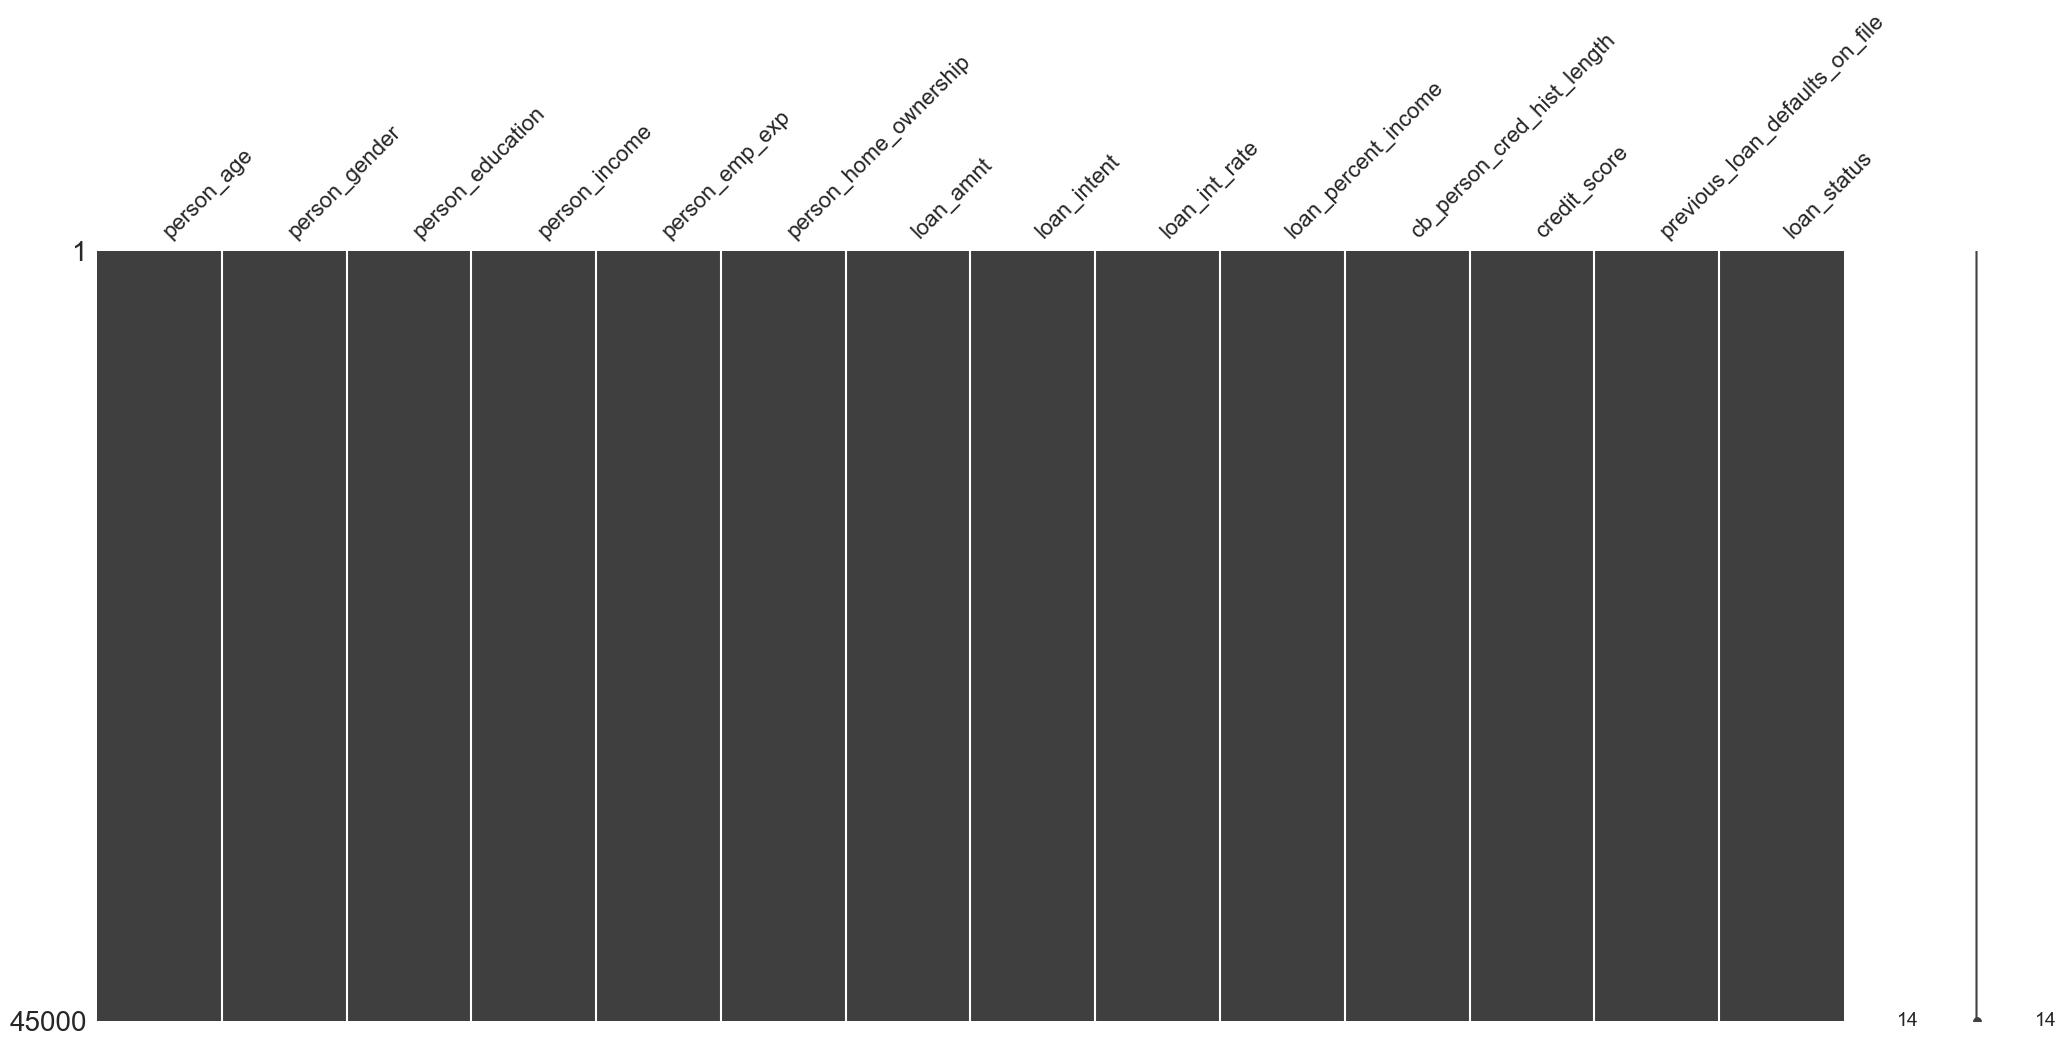

In [104]:
# Explore MissingNo
mno.matrix(df)

# Data Exploration and Categorical Analysis

In [105]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

Categorical columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


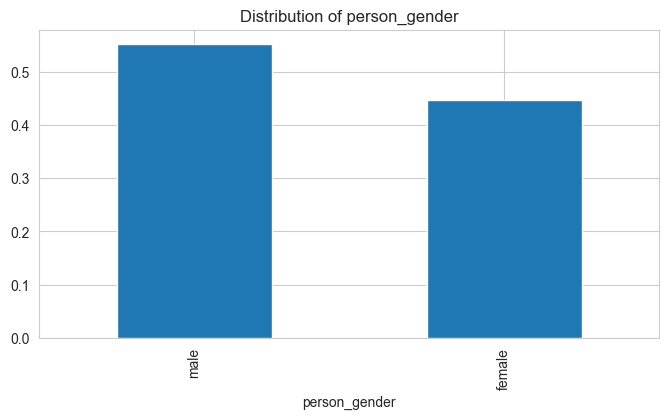

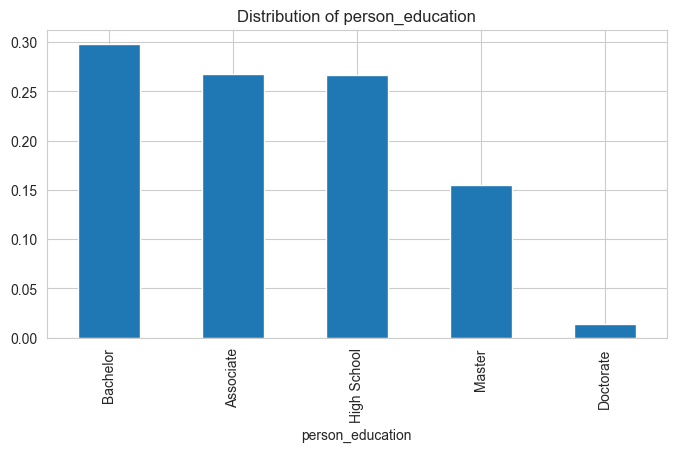

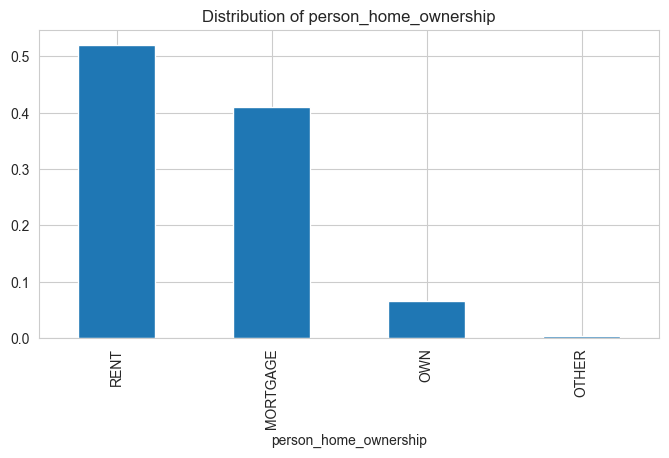

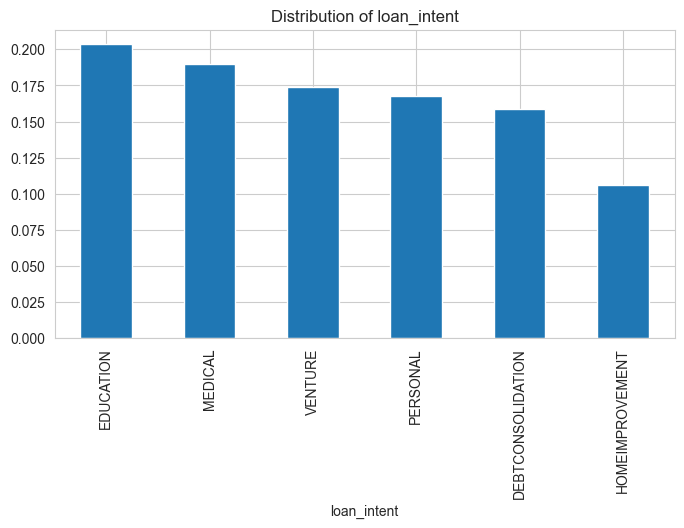

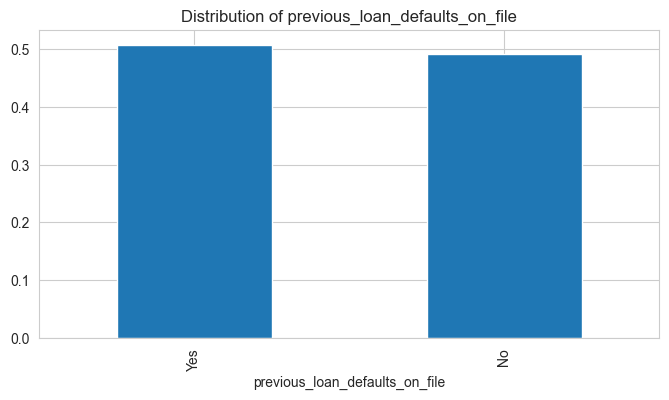

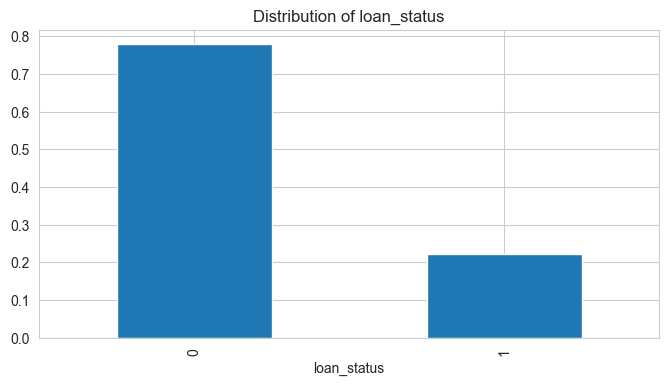

In [106]:
# Univariate analysis of categorical variables
for col in categorical_columns + ['loan_status']:
    fig = plt.figure(figsize=(8, 4))
    df[col].value_counts(normalize=True).plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.show()

# Notes on Categorical Analysis:
Firstly, there are no spelling errors present in the dataset. Secondly, given that the "Own" and "Other" categories constitute a small proportion of the person_home_ownership variable, it may be appropriate to consolidate them into a single "Others" category for more effective analysis. Lastly, the overall distribution of the remaining categorical variables appears well-balanced. However, an exception is observed in the person_education variable, where the "Doctorate" group represents a notably small subset of the population - consider dropping this all together. 

# Numerical Analysis

Numerical columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']


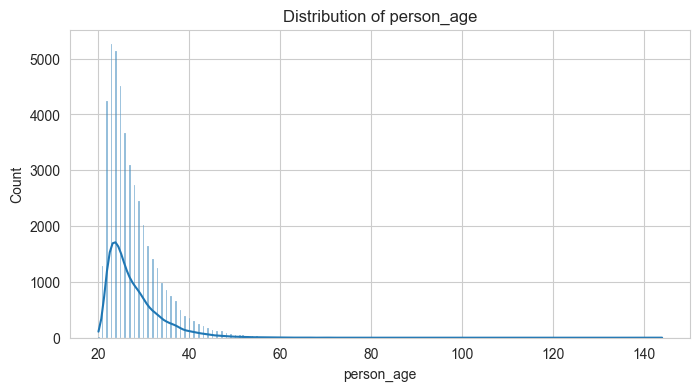

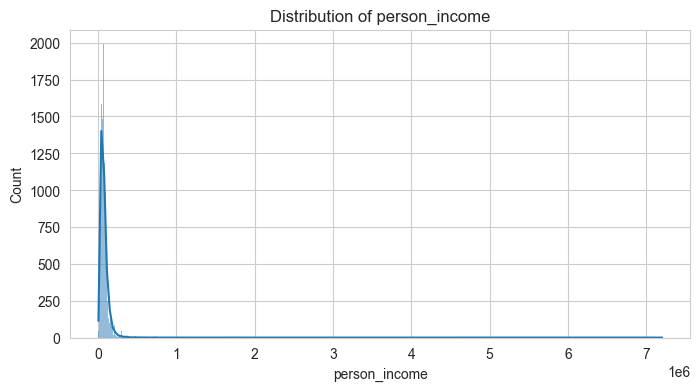

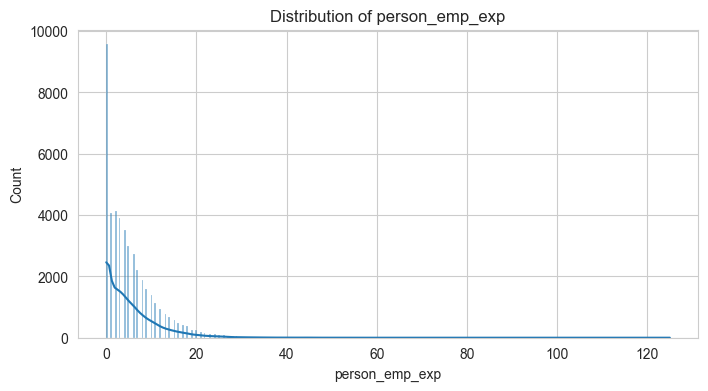

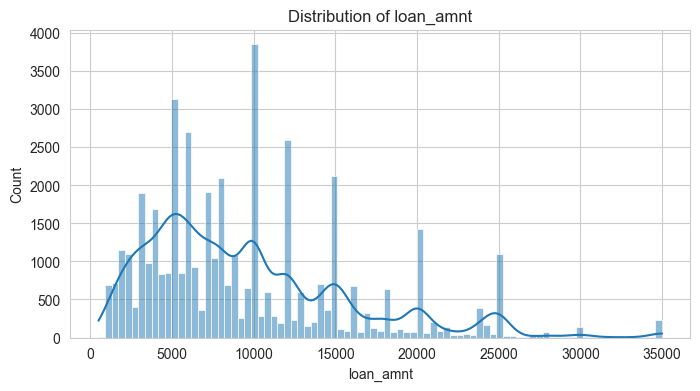

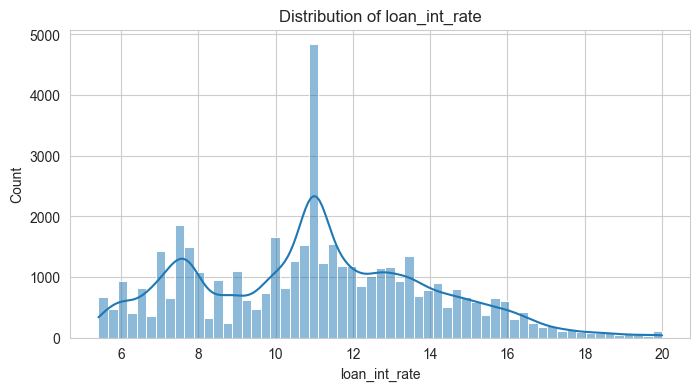

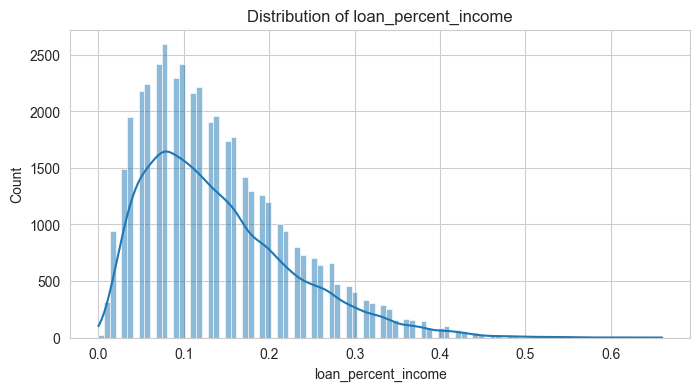

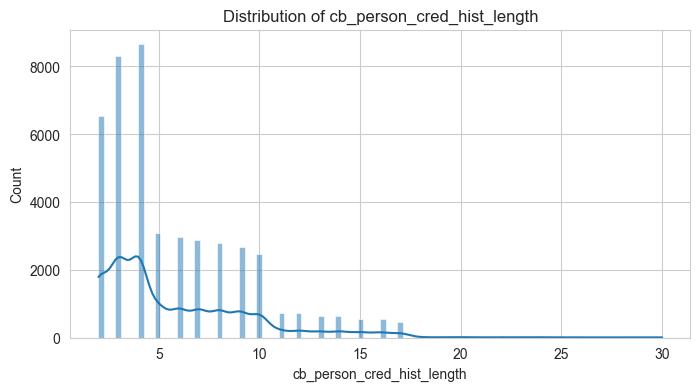

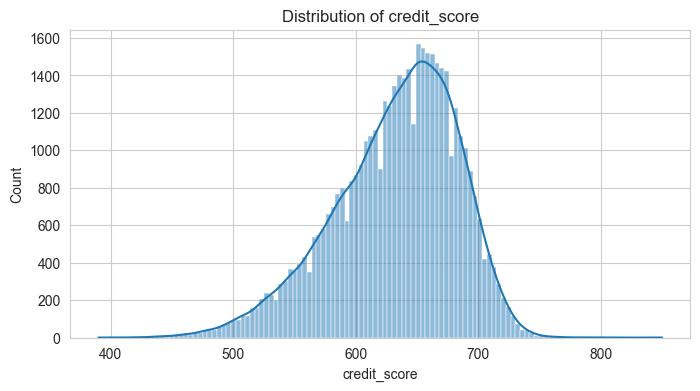

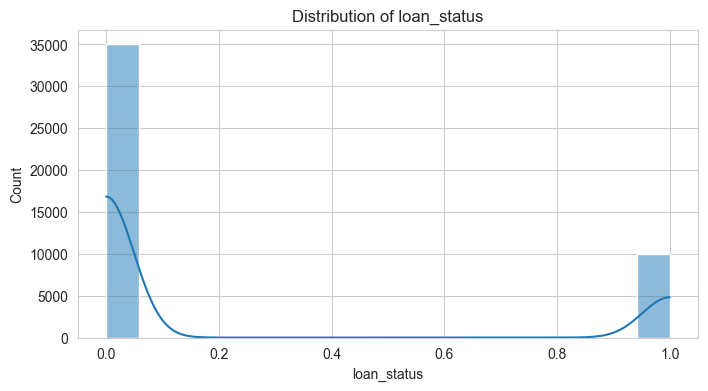

In [107]:
# Univariate analysis of numerical variables
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical columns:", numerical_columns)
for col in numerical_columns:
    fig = plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [108]:
# Checking for skewness in each of the numerical variables
numericalColumns = df.select_dtypes(include=[ 'int64'])
numericalColumns[:10]              

#Checking for skewness in the numerical columns.
skewness = df[numericalColumns.columns].skew()
print(skewness)

person_age                     2.548154
person_income                 34.137583
person_emp_exp                 2.594917
loan_amnt                      1.179731
cb_person_cred_hist_length     1.631720
credit_score                  -0.610261
loan_status                    1.336351
dtype: float64


# Notes on Numerical variables
The skewness results for the numerical variables indicate that several distributions are significantly non-normal, with a strong tendency toward right skewness. Notably, person_income shows an extreme right skew (skewness = 34.14), suggesting the presence of a few individuals with very high incomes that distort the overall distribution. Similarly, person_age and person_emp_exp both exhibit strong right skewness (2.55 and 2.59, respectively), likely influenced by outliers such as individuals with unusually high age or employment experience values as mentioned earlier in summary stats. The loan_amnt and cb_person_cred_hist_length variables also display moderate right skewness, indicating that most applicants request lower loan amounts and have relatively short credit histories. In contrast, credit_score shows a moderate left skew (-0.61), suggesting a concentration of higher credit scores with fewer individuals having poor credit. Lastly, the loan_status variable is moderately right-skewed (1.34), reflecting an imbalance in loan approvals versus rejections, which may require attention during classification tasks. 

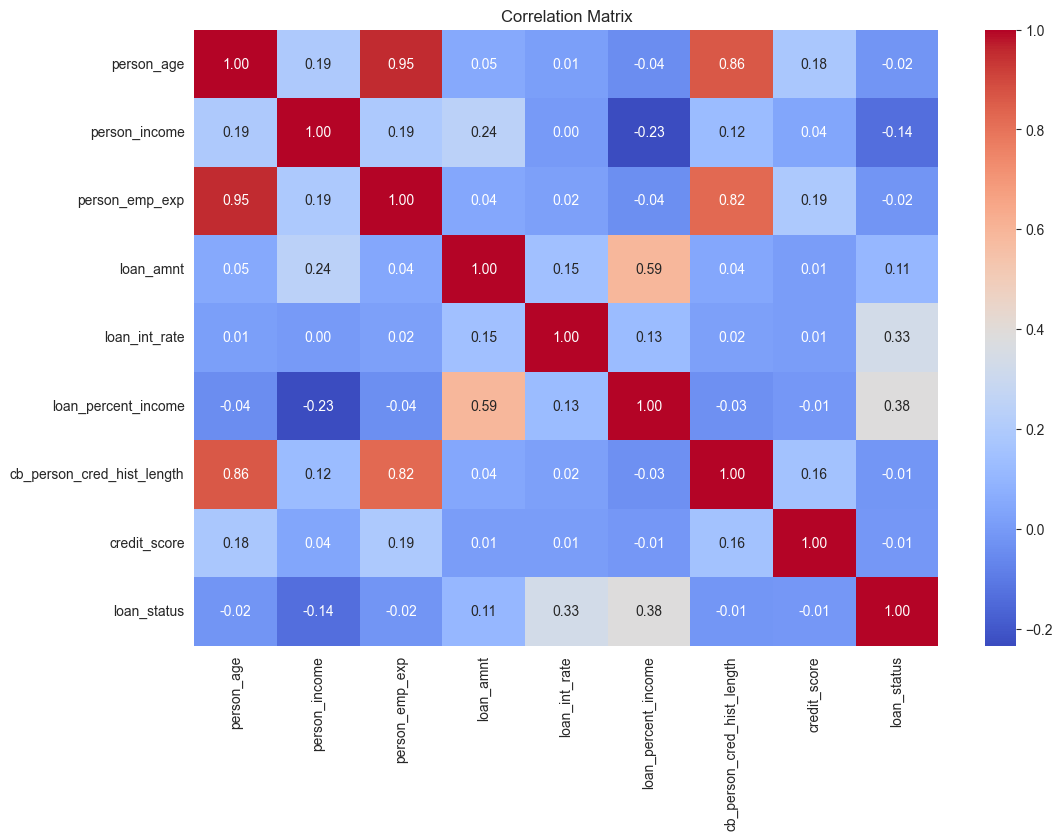

In [109]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Notes on Correlation Matrix
Strong positive correlations: person_age and person_emp_exp (0.95): Older individuals tend to have more work experience, person_age and cb_person_cred_hist_length (0.86): Older applicants generally have longer credit histories, and person_emp_exp and cb_person_cred_hist_length (0.82): More experienced individuals also tend to have longer credit histories.

Moderate correlations:loan_amnt and loan_percent_income (0.59): Larger loan amounts typically make up a higher percentage of a person’s income, loan_status and loan_percent_income (0.38): Applicants with a higher loan-to-income ratio are more likely to be rejected, and loan_status and loan_int_rate (0.33): Higher interest rates are moderately associated with loan rejection.

Weak or negligible correlations:loan_status has weak correlation with most features, including person_age, person_income, person_emp_exp, and credit_score and person_income shows very little correlation with other variables, except a slight negative correlation with loan_percent_income (-0.23).

# Identifying Numerical Variable Multicolinearity 

                      Feature       VIF
1               person_income  1.430818
2              person_emp_exp  3.229168
3                   loan_amnt  2.040333
4               loan_int_rate  1.024794
5         loan_percent_income  2.019054
6  cb_person_cred_hist_length  3.134232
7                credit_score  1.036041


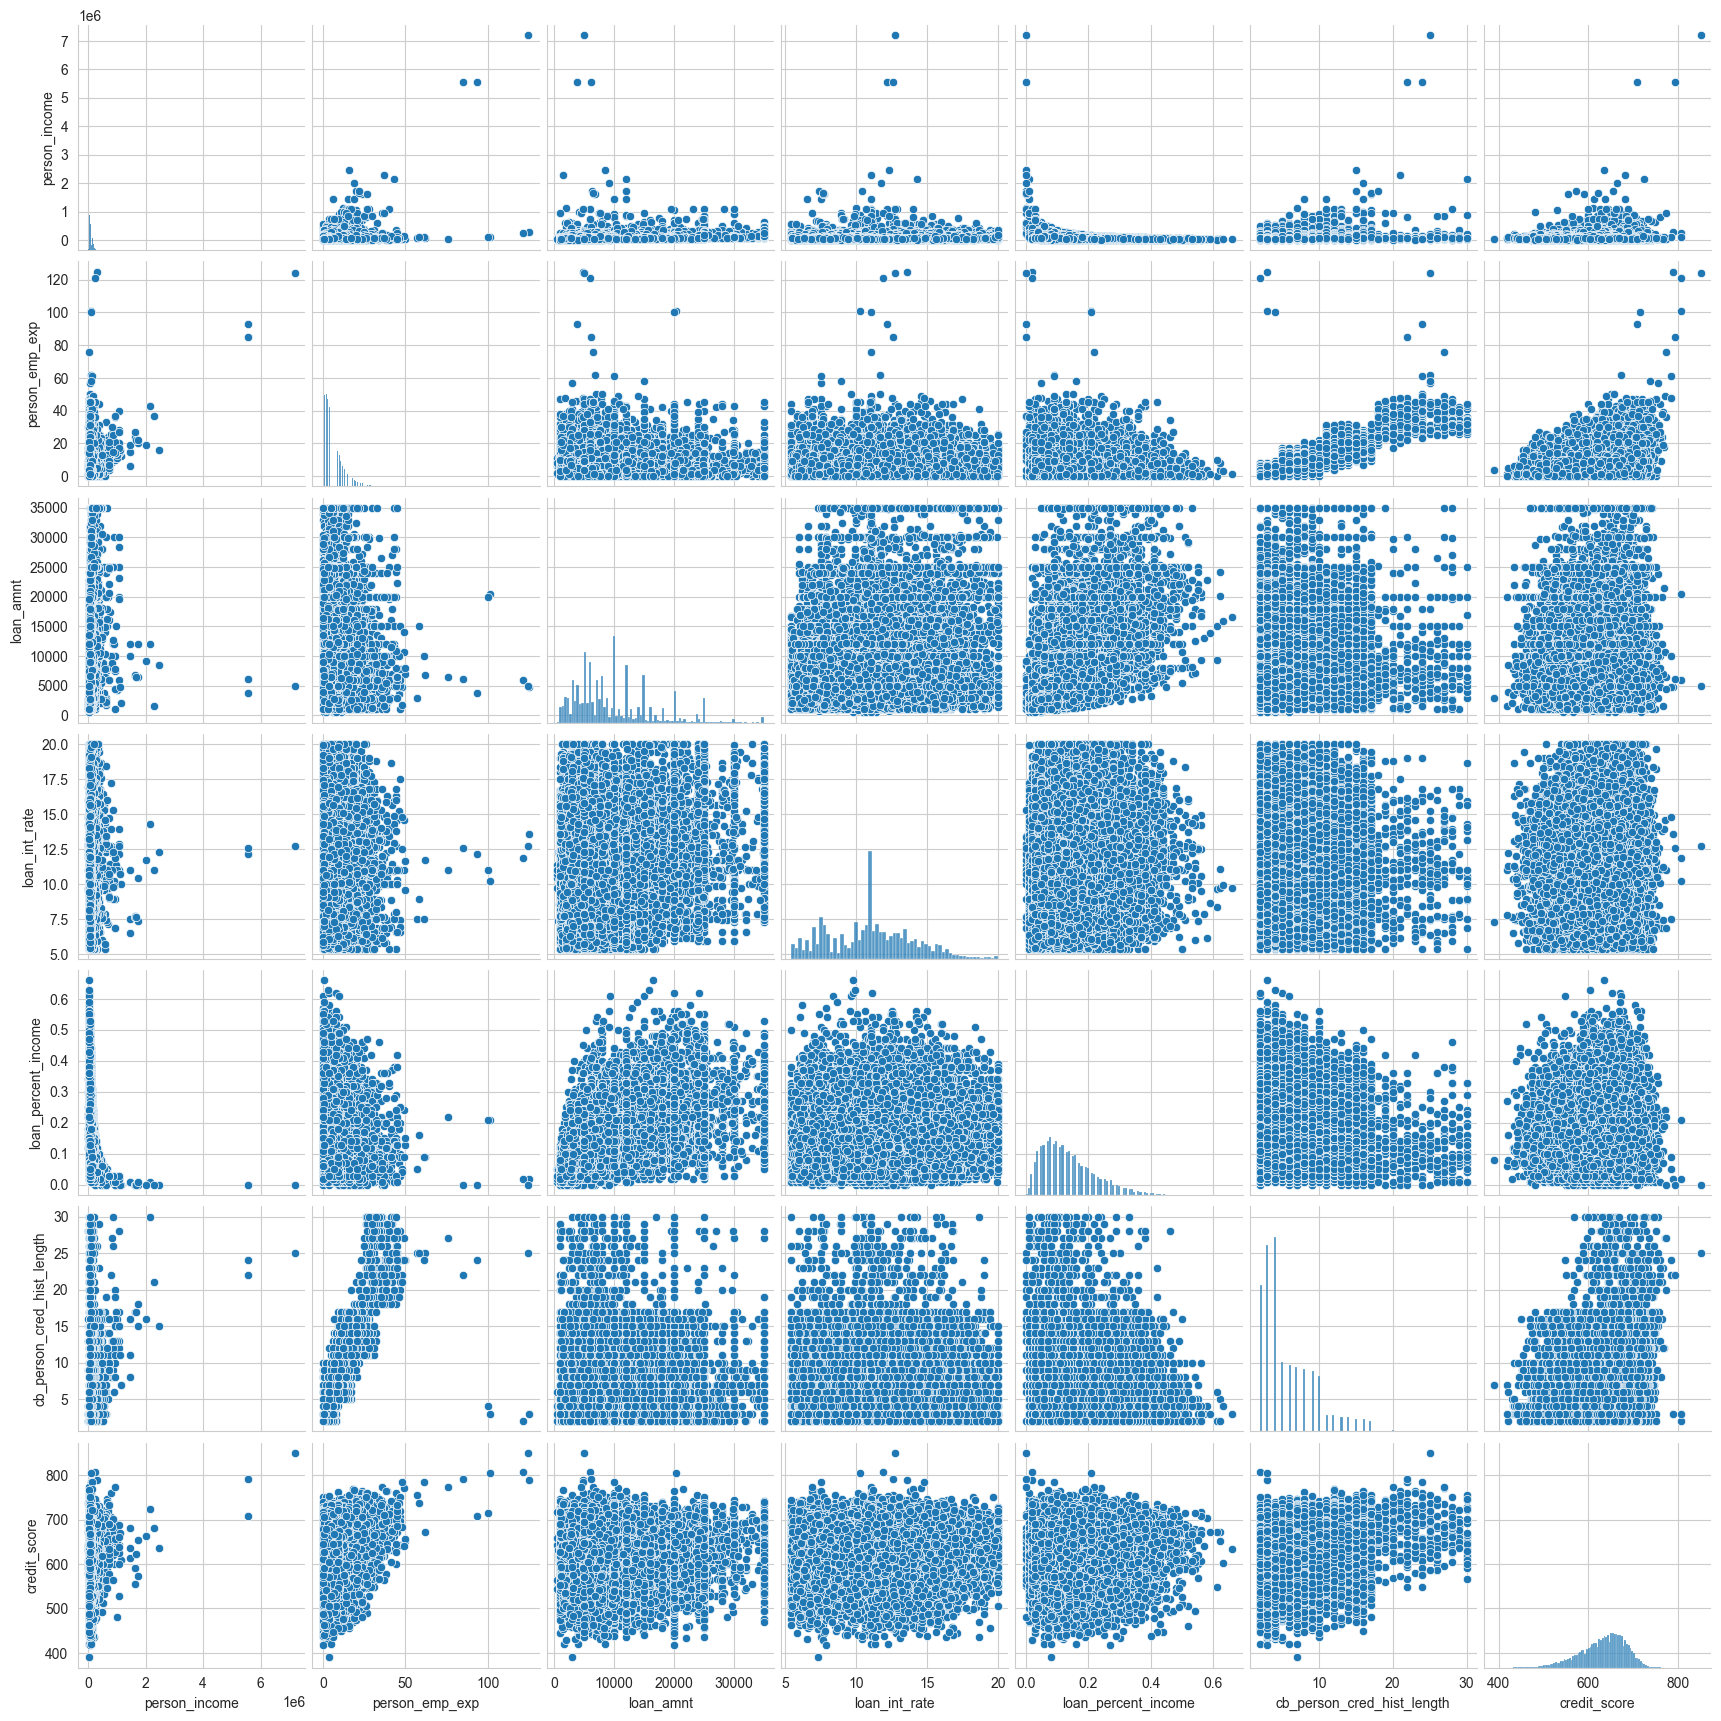

In [110]:
num_cols = ['person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length','credit_score']

# Subset the numerical columns
X = df[num_cols].copy()

# Add constant term for VIF calculation (intercept)
X_const = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Drop constant term (intercept) from results for clarity
vif_data = vif_data[vif_data["Feature"] != "const"]

print(vif_data)

#Pair plot of numerical columns
numerical_vars = ['person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length','credit_score']
sns.pairplot(df[numerical_vars])
sns.set_style("whitegrid")
plt.show()

**Notes on Multicolinearity of Numerical variables**
The Variance Inflation Factor (VIF) analysis indicates that there is no significant multicollinearity among the selected numerical features in the dataset. All VIF values fall well below the common threshold of 5, suggesting that none of the variables are excessively correlated with one another. Specifically, variables such as person_income, loan_int_rate, and credit_score exhibit very low VIF values, confirming their independence from the other predictors. While person_emp_exp and cb_person_cred_hist_length show moderately higher VIFs around 3, these values are still within acceptable limits and do not pose a concern. Overall, the dataset's numerical features are suitable for use  without the risk of multicollinearity distorting the results. Additionally, the par plot between the numerical columns further suggest no significant relationship amongst the columns. 

# Data Cleaning & Preprocessing

In [111]:
# Copy original df to df_cleaned
df_cleaned = df.copy()

In [112]:
# Remove unrealistic ages
original_row_count = df_cleaned.shape[0]
df_cleaned = df_cleaned[df_cleaned['person_age'] <= 125]
removed_count = original_row_count - df_cleaned.shape[0]


changelog.append({
    'column': 'age',
    'change': f'Removed {removed_count} row(s) where age > 125',
    'rationale': 'Oldest verified human lived to be 122; values above 125 are likely errors or outliers.',
})


In [113]:
# Drop loan_status column
df_cleaned.drop(columns=['loan_status'], inplace=True)
df_cleaned.reset_index(drop=True, inplace=True)
numerical_columns = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
changelog.append({
    'column': 'loan_status',
    'change': 'Dropped loan_status column',
    'rationale': 'Target variable for classification; not needed in cleaned dataset.',
})


Numerical columns after capping: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']


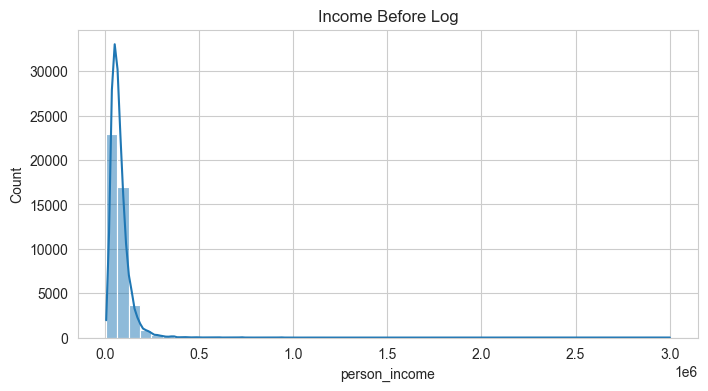

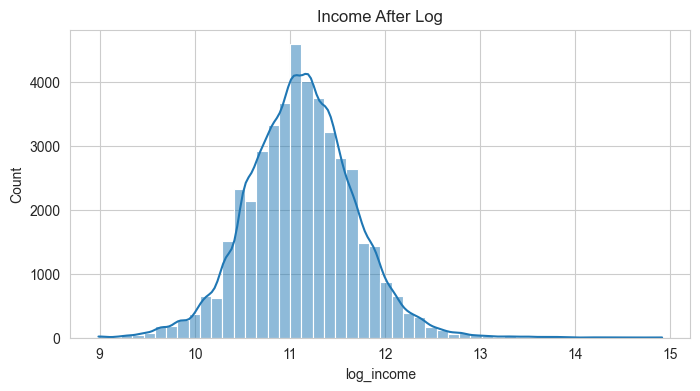

In [114]:
# Cap outliers before log-transform
df_cleaned['person_income'] = np.where(df_cleaned['person_income'] > 3_000_000, 3_000_000, df_cleaned['person_income'])


# Show numerical columns after capping
print("Numerical columns after capping:", numerical_columns)


# Apply log1p to preserve 0s and small values
df_cleaned['log_income'] = np.log1p(df_cleaned['person_income'])
changelog.append({
    'column': 'person_income',
    'change': 'Capped person_income at $3,000,000 and applied log1p transformation',
    'rationale': 'Handled extreme right skew and outliers in income distribution; log1p applied to normalize values and removed person_income for modeling.',
})


plt.figure(figsize=(8, 4))
sns.histplot(df_cleaned['person_income'], bins=50, kde=True)
plt.title("Income Before Log")
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(df_cleaned['log_income'], bins=50, kde=True)
plt.title("Income After Log")
plt.show()


In [115]:
# Drop person_income after log-transform
df_cleaned.drop(columns=['person_income'], inplace=True)
df_cleaned.reset_index(drop=True, inplace=True)
numerical_columns = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()


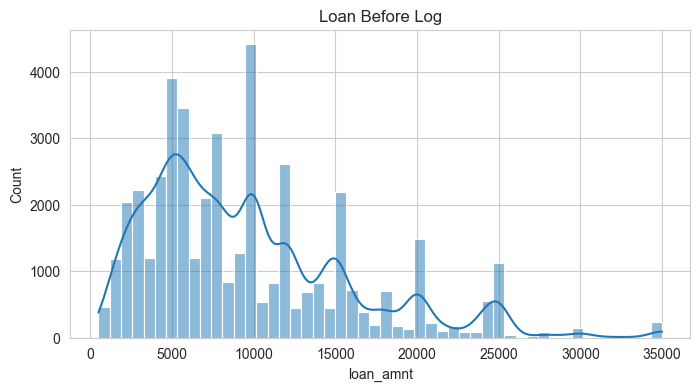

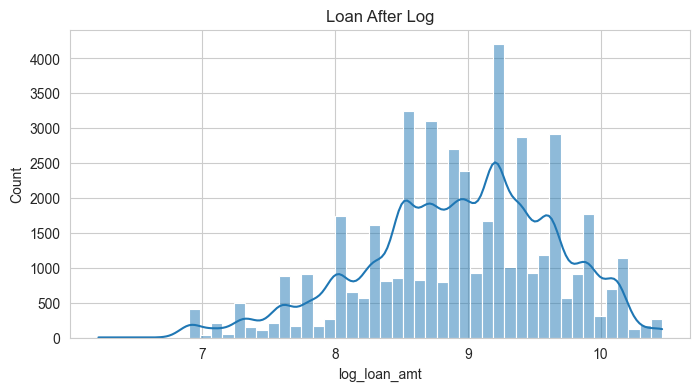

In [116]:
# Apply log1p to preserve 0s and small values
df_cleaned['log_loan_amt'] = np.log1p(df_cleaned['loan_amnt'])
changelog.append({
    'column': 'loan_amnt',
    'change': 'Applied log1p transformation to loan_amount',
    'rationale': 'Handled extreme right skew and outliers in loan amount distribution; log1p applied to normalize values.',
})

plt.figure(figsize=(8, 4))
sns.histplot(df_cleaned['loan_amnt'], bins=50, kde=True)
plt.title("Loan Before Log")
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(df_cleaned['log_loan_amt'], bins=50, kde=True)
plt.title("Loan After Log")
plt.show()

In [117]:
# Drop loan_amnt after log-transform
df_cleaned.drop(columns=['loan_amnt'], inplace=True)
df_cleaned.reset_index(drop=True, inplace=True)
numerical_columns = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

In [118]:
# Remove unrealistic person_emp_exp values
original_row_count = df_cleaned.shape[0]
df_cleaned = df_cleaned[df_cleaned['person_emp_exp'] <= 70]
removed_count = original_row_count - df_cleaned.shape[0]
changelog.append({
    'column': 'person_emp_exp',
    'change': f'Removed {removed_count} row(s) where person_emp_exp > 70',
    'rationale': 'Unrealistic employment experience; values above 70 years are likely errors or outliers.',
}) 

In [119]:
# Scale numerical columns using MinMaxScaler
minmax_scaler = MinMaxScaler()
df_cleaned[numerical_columns] = minmax_scaler.fit_transform(df_cleaned[numerical_columns])
df_cleaned.head()


# Changelog for scaling
changelog.append({
    'column': 'numerical_columns',
    'change': 'Scaled numerical columns using MinMaxScaler',
    'rationale': 'Normalized numerical features to a range of [0, 1] for better model performance.',
})


<class 'pandas.core.frame.DataFrame'>
Index: 44992 entries, 0 to 44996
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44992 non-null  float64
 1   person_gender                   44992 non-null  object 
 2   person_education                44992 non-null  object 
 3   person_emp_exp                  44992 non-null  float64
 4   person_home_ownership           44992 non-null  object 
 5   loan_intent                     44992 non-null  object 
 6   loan_int_rate                   44992 non-null  float64
 7   loan_percent_income             44992 non-null  float64
 8   cb_person_cred_hist_length      44992 non-null  float64
 9   credit_score                    44992 non-null  float64
 10  previous_loan_defaults_on_file  44992 non-null  object 
 11  log_income                      44992 non-null  float64
 12  log_loan_amt                    44992

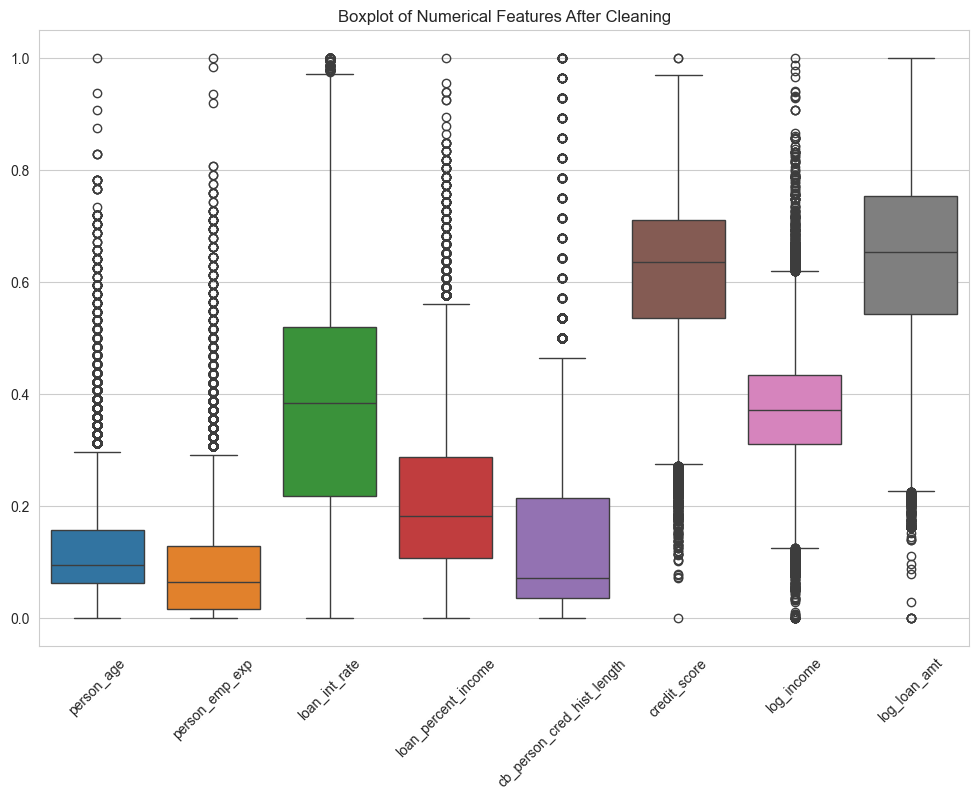

In [120]:
# Check cleaned data
df_cleaned.info()
df_cleaned.describe()

# Plot boxplot for cleaned data
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned[numerical_columns])
plt.title('Boxplot of Numerical Features After Cleaning')
plt.xticks(rotation=45)
plt.show()

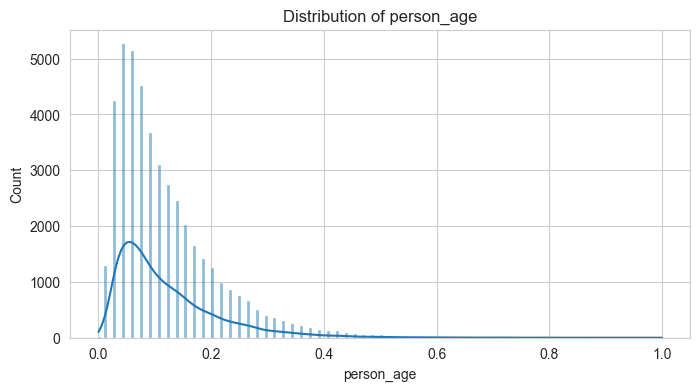

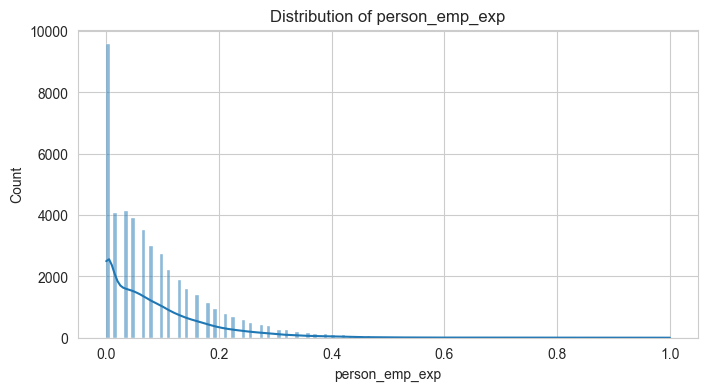

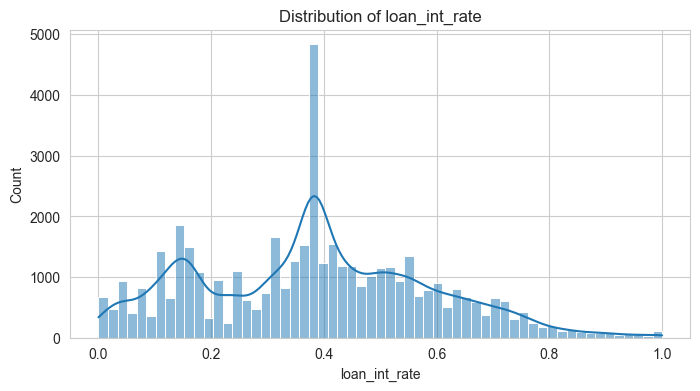

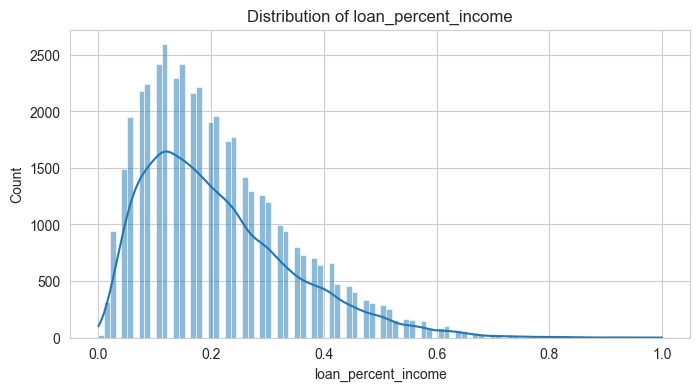

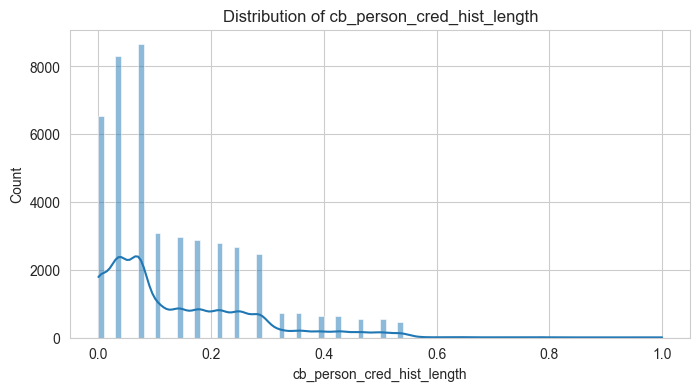

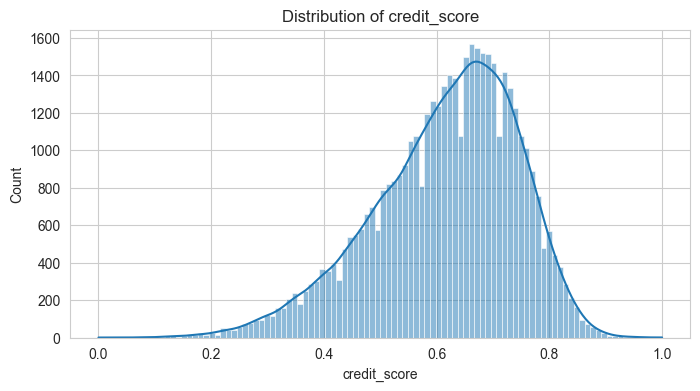

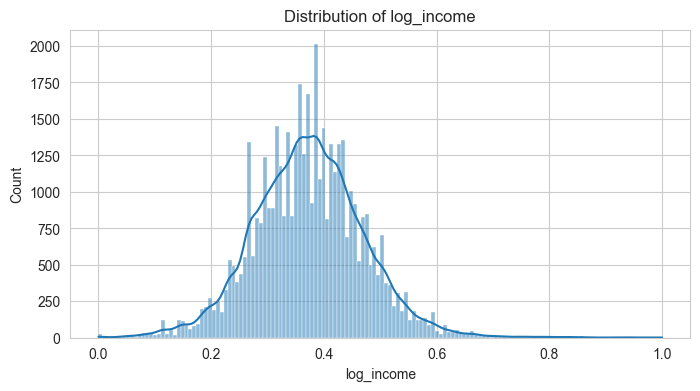

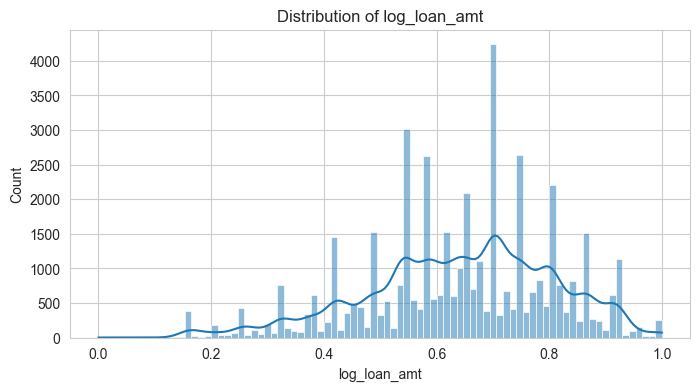

In [121]:
for col in numerical_columns:
    fig = plt.figure(figsize=(8, 4))
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [122]:
# Change summary intialization and check
change_summary = pd.DataFrame(changelog)
pd.set_option('display.max_colwidth', None)
display(change_summary)  

,column,change,rationale
0,age,Removed 3 row(s) where age > 125,Oldest verified human lived to be 122; values above 125 are likely errors or outliers.
1,loan_status,Dropped loan_status column,Target variable for classification; not needed in cleaned dataset.
2,person_income,"Capped person_income at $3,000,000 and applied log1p transformation",Handled extreme right skew and outliers in income distribution; log1p applied to normalize values and removed person_income for modeling.
3,loan_amnt,Applied log1p transformation to loan_amount,Handled extreme right skew and outliers in loan amount distribution; log1p applied to normalize values.
4,person_emp_exp,Removed 5 row(s) where person_emp_exp > 70,Unrealistic employment experience; values above 70 years are likely errors or outliers.
5,numerical_columns,Scaled numerical columns using MinMaxScaler,"Normalized numerical features to a range of [0, 1] for better model performance."


<class 'pandas.core.frame.DataFrame'>
Index: 44992 entries, 0 to 44996
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44992 non-null  float64
 1   person_gender                   44992 non-null  object 
 2   person_education                44992 non-null  object 
 3   person_emp_exp                  44992 non-null  float64
 4   person_home_ownership           44992 non-null  object 
 5   loan_intent                     44992 non-null  object 
 6   loan_int_rate                   44992 non-null  float64
 7   loan_percent_income             44992 non-null  float64
 8   cb_person_cred_hist_length      44992 non-null  float64
 9   credit_score                    44992 non-null  float64
 10  previous_loan_defaults_on_file  44992 non-null  object 
 11  log_income                      44992 non-null  float64
 12  log_loan_amt                    44992

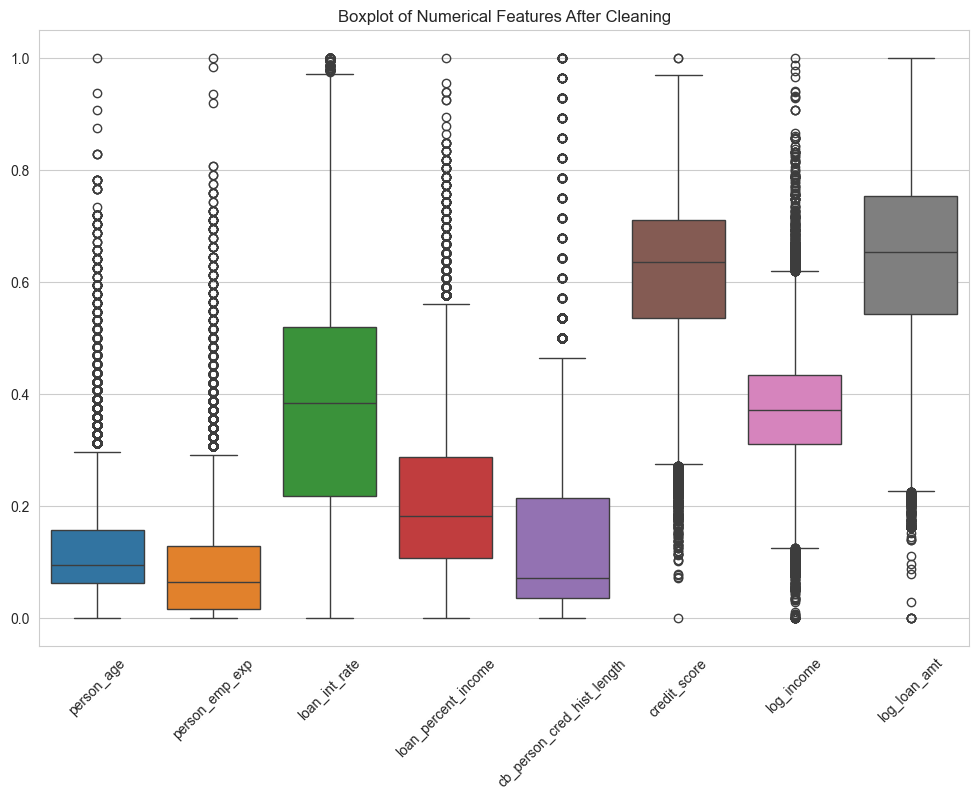

In [123]:
# Check cleaned data
df_cleaned.info()
df_cleaned.describe()

# Plot boxplot for cleaned data
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned[numerical_columns])
plt.title('Boxplot of Numerical Features After Cleaning')
plt.xticks(rotation=45)
plt.show()

# Feature Engineering

<h5>  Regroup the Person Education </h5>
Since *Master* and *Doctorate* degrees are both Graduate degrees, we can combine those two categories into one and rename as *Graduate*.

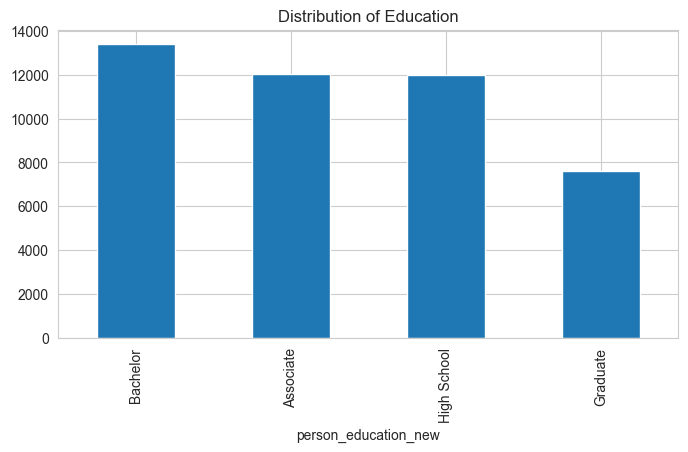

Number of records:  117


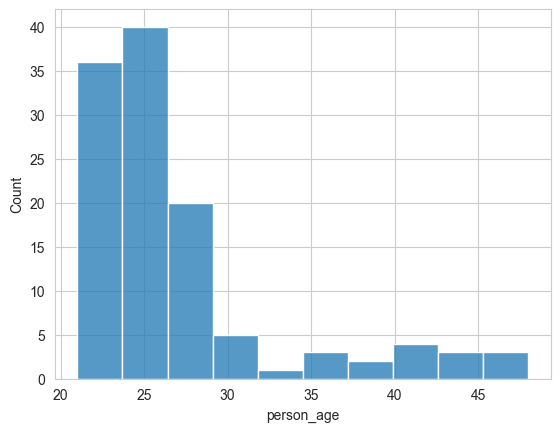

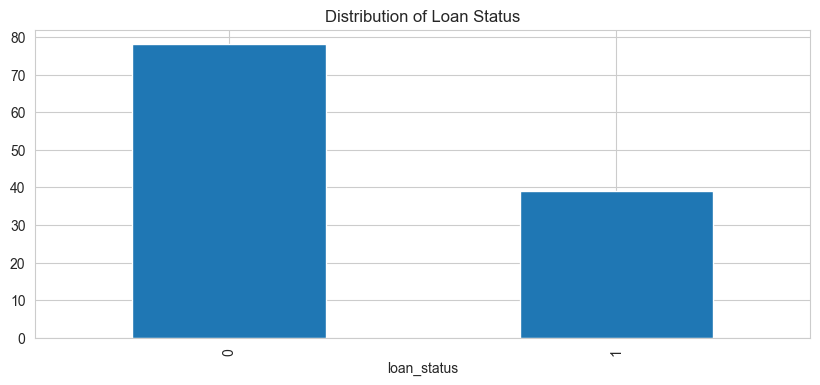

In [124]:
# Create the new mappings
grad_edu = {'Master': 'Graduate',
            'Doctorate': 'Graduate'
}

#Create new field with the updated values
df_cleaned['person_education_new'] = df['person_education'].replace(grad_edu)

#View the new distribution for education
fig = plt.figure(figsize=(8, 4))
df_cleaned['person_education_new'].value_counts().plot(kind='bar')
plt.title(f"Distribution of Education")
plt.show()

#Drop the original field
df_cleaned.drop('person_education', axis=1, inplace=True)

#Update the change log
changelog.append({
    'column': 'person_education',
    'change': 'Combined Master and Doctorate categories into one group -- Graduate',
    'rationale': 'Doctorate had the lowest frequency out of all the categories which could impact analysis',
})

#Create dataframe to hold the subset of data
other_home_ownership = df[df['person_home_ownership'] == 'OTHER']
#Find the number of records that fall into this subset
print("Number of records: ", len(other_home_ownership))

other_home_ownership.describe(include='all')


#Look at the distribution for age
sns.histplot(other_home_ownership['person_age'], bins=10)

#Look at the distribution for loan amount
fig = plt.figure(figsize=(10, 4))
other_home_ownership['loan_status'].value_counts().plot(kind='bar')
plt.title(f"Distribution of Loan Status")
plt.show()



Within this subset of data, there is a difference in classes such that these records should remain in the dataset and the low frequency of the category should be handled so that it doesn't impact the analysis of the variable.

Since the *Rent* and *Mortgage* categories have high frequencies and *Own* and *Other* have lower frequencies, we can combine them into two groups *Homeowner* and *Non-Homeowner*. *Rent* and *Other* would fall under *Non-Homeowner** and *Mortgage* and *Own* would fall until *Homeowner*.

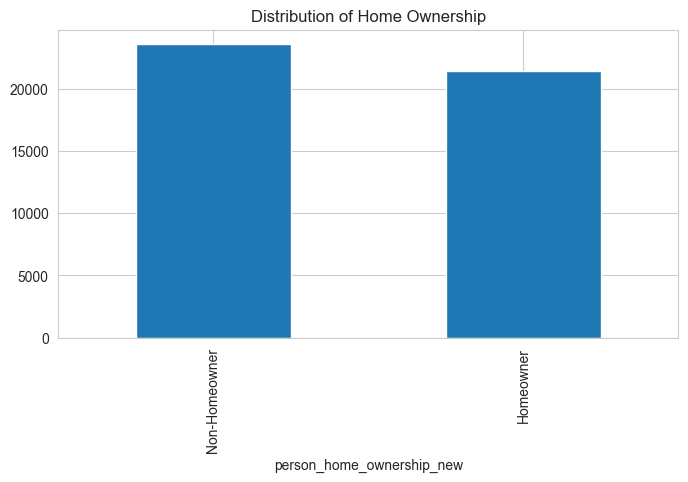

In [125]:
#Mapping for new categories
ownership = {'RENT': 'Non-Homeowner',
             'OTHER': 'Non-Homeowner',
             'MORTGAGE': 'Homeowner',
             'OWN': 'Homeowner'
}

#Create new field with the updated values
df_cleaned['person_home_ownership_new'] = df['person_home_ownership'].replace(ownership)

#View the new distribution
fig = plt.figure(figsize=(8, 4))
df_cleaned['person_home_ownership_new'].value_counts().plot(kind='bar')
plt.title(f"Distribution of Home Ownership")
plt.show()

#Drop the original field
df_cleaned.drop('person_home_ownership', axis=1, inplace=True)


In [126]:
#Update the change log
changelog.append({
    'column': 'person_home_ownership',
    'change': 'Combined RENT and OTHER into Non-Homeowner category and MORTGAGE and OWN into Homeowner category',
    'rationale': 'RENT and MORTGAGE had high frequencies while OWN and OTHER had low frequencies which could impact analysis',
})

In [127]:
# Reilitialize categorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

Categorical columns: ['person_gender', 'loan_intent', 'previous_loan_defaults_on_file', 'person_education_new', 'person_home_ownership_new']


In [128]:
# Apply one-hot encoding to existing categorical_columns
df_cleaned = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True, dtype=int)

# Review structure of df_cleaned after encoding
df_cleaned.info()

# Add to changelog
changelog.append({
    'column': categorical_columns,
    'change': 'Applied one-hot encoding (drop_first=True)',
    'rationale': 'Converted categorical variables into binary indicators for model compatibility.',
})


<class 'pandas.core.frame.DataFrame'>
Index: 44992 entries, 0 to 44996
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   person_age                               44992 non-null  float64
 1   person_emp_exp                           44992 non-null  float64
 2   loan_int_rate                            44992 non-null  float64
 3   loan_percent_income                      44992 non-null  float64
 4   cb_person_cred_hist_length               44992 non-null  float64
 5   credit_score                             44992 non-null  float64
 6   log_income                               44992 non-null  float64
 7   log_loan_amt                             44992 non-null  float64
 8   person_gender_male                       44992 non-null  int32  
 9   loan_intent_EDUCATION                    44992 non-null  int32  
 10  loan_intent_HOMEIMPROVEMENT              44992 non-

In [129]:
# Readd target variable
df_cleaned['loan_status'] = df['loan_status']

# Changelog for readding target variable
changelog.append({
    'column': 'loan_status',
    'change': 'Readded loan_status column',
    'rationale': 'Target variable for classification; readded after cleaning and preprocessing.',
})

In [130]:
# Change summary intialization and check
change_summary = pd.DataFrame(changelog)
pd.set_option('display.max_colwidth', None)
display(change_summary)  

,column,change,rationale
0,age,Removed 3 row(s) where age > 125,Oldest verified human lived to be 122; values above 125 are likely errors or outliers.
1,loan_status,Dropped loan_status column,Target variable for classification; not needed in cleaned dataset.
2,person_income,"Capped person_income at $3,000,000 and applied log1p transformation",Handled extreme right skew and outliers in income distribution; log1p applied to normalize values and removed person_income for modeling.
3,loan_amnt,Applied log1p transformation to loan_amount,Handled extreme right skew and outliers in loan amount distribution; log1p applied to normalize values.
4,person_emp_exp,Removed 5 row(s) where person_emp_exp > 70,Unrealistic employment experience; values above 70 years are likely errors or outliers.
5,numerical_columns,Scaled numerical columns using MinMaxScaler,"Normalized numerical features to a range of [0, 1] for better model performance."
6,person_education,Combined Master and Doctorate categories into one group -- Graduate,Doctorate had the lowest frequency out of all the categories which could impact analysis
7,person_home_ownership,Combined RENT and OTHER into Non-Homeowner category and MORTGAGE and OWN into Homeowner category,RENT and MORTGAGE had high frequencies while OWN and OTHER had low frequencies which could impact analysis
8,"[person_gender, loan_intent, previous_loan_defaults_on_file, person_education_new, person_home_ownership_new]",Applied one-hot encoding (drop_first=True),Converted categorical variables into binary indicators for model compatibility.
9,loan_status,Readded loan_status column,Target variable for classification; readded after cleaning and preprocessing.


In [131]:
# Export Change Summary to CSV
change_summary.to_csv("../Changelogs/change_summary.csv", index=False)

In [132]:
# Export cleaned data
df_cleaned.to_csv("../Data/cleaned_loan_data.csv", index=False)
print("Cleaned data exported to cleaned_loan_data.csv")

Cleaned data exported to cleaned_loan_data.csv
